In [1]:
from keras.datasets import mnist
import numpy as np 
import json
from web3 import Web3
import matplotlib.pyplot as plt
ganache_url ="http://127.0.0.1:8545"
ropsten_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
web3 = Web3(Web3.HTTPProvider(ropsten_url))
web3.isConnected()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


True

In [2]:
## Sigmoid contract

In [3]:
sig_abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
sig_cont_address = "0x2813a858aAD2E95a74AA7c4550e184B63484c85e"
sig_cont = web3.eth.contract(address=sig_cont_address,abi=sig_abi)

In [4]:
## Softmax contract

In [5]:
soft_abi = json.loads('[ { "constant": false, "inputs": [], "name": "del_arr", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [], "name": "set_sumexp", "outputs": [ { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": false, "inputs": [], "name": "get_softmax", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [ { "name": "C", "type": "int256" }, { "name": "D", "type": "int256" }, { "name": "k", "type": "uint256" }, { "name": "j", "type": "uint256" } ], "name": "getexpon", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [], "name": "setexpon", "outputs": [ { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "set_softmax", "outputs": [ { "name": "", "type": "uint256[]" }, { "name": "", "type": "uint256[]" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": false, "inputs": [], "name": "sum_exp", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "", "type": "int256" } ], "name": "exp", "outputs": [ { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "setallexpon", "outputs": [ { "name": "", "type": "uint256[]" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
soft_cont_address = "0x14aed733cB82F547315Bde1f2F7466E8859484D9"
soft_cont = web3.eth.contract(address=soft_cont_address,abi=soft_abi)

In [6]:
## NN-LayerContract

In [7]:
nn_abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "b1", "type": "int256[]" } ], "name": "multiply_layer1", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [ { "name": "l1_output", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "w5", "type": "int256[]" }, { "name": "w6", "type": "int256[]" }, { "name": "w7", "type": "int256[]" }, { "name": "w8", "type": "int256[]" }, { "name": "w9", "type": "int256[]" }, { "name": "w10", "type": "int256[]" }, { "name": "b2", "type": "int256[]" } ], "name": "multiply_layer2", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [], "name": "print_l1", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "print_l2", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
nn_cont_address = "0x44e3CA7ca2245b459f9B4b9fd11ec36750257D94"
nn_cont = web3.eth.contract(address=nn_cont_address,abi=nn_abi)

In [8]:
# account1 = "0x2C0c1D0dA7c537ad49b6AD3cdF0ed6db462446E9"
# private_key1="d2b80a53fd2b1a30ecbe14517a65c07858679034061f2d0d5f768518ed46a1b6"
# account2 = "0x76b717F8b07365060131752EE08242C268CFd37B"
# private_key2="a3e852bd651cf3aa5f6d863e0727519140431ae912588b351ab5f7ee02e06cac"

In [9]:
#grit
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"

In [10]:
def getlayer1(x,w11,w12,w13,w14,b1):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = nn_cont.functions.multiply_layer1(
        x,w11,w12,w13,w14,b1
         ).buildTransaction({
        'gas': 800000000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=300)
    return tx_receipt.gasUsed


def getlayer2(l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = nn_cont.functions.multiply_layer2(
        l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2
         ).buildTransaction({
        'gas': 8700000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=300)
    return tx_receipt.gasUsed


def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = sig_cont.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

def getexpon(a,b,c,d):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = soft_cont.functions.getexpon(
        a,b,c,d
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

def getsumexpon():
    nonce = web3.eth.getTransactionCount(account1)
    transaction = soft_cont.functions.sum_exp(
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

def getsoftmax():
    nonce = web3.eth.getTransactionCount(account1)
    transaction = soft_cont.functions.get_softmax(
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [11]:
print(nn_cont.functions.print_l1().call())
print(nn_cont.functions.print_l2().call())
n, d = sig_cont.functions.sigprint().call()
print("value of sigmoid is:", n/d)
print(soft_cont.functions.set_softmax().call())

[1798135, -1043560, -2615846, 1134640]
[-41, 5, -11, -8, 33, 2, -16, 10, 10, 32]
value of sigmoid is: 1.0
[[0, 0, 23558331, 0, 9420585631, 0, 1, 35488624655893883195338, 0, 511328671423], [35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724, 35488624656414656010724]]


In [12]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:

from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_orig_test = y_test

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [14]:
from tensorflow import keras
from keras.datasets import mnist
from keras import utils as np_utils

# Setup train and test splits
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
# print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

# This is the one-hot version of: [5, 0, 4, 1, 9]
"""
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
"""

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'\n[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\n [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]\n [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]\n'

In [15]:
import matplotlib.pyplot as plt 
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=8, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


2022-04-15 19:15:56.536312: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
422/422 [==============================] - 1s 2ms/step - loss: 1.8152 - acc: 0.4973 - val_loss: 1.5953 - val_acc: 0.6812
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 1.5140 - acc: 0.6682 - val_loss: 1.3808 - val_acc: 0.7410
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 1.3441 - acc: 0.7228 - val_loss: 1.2394 - val_acc: 0.7587
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 1.2193 - acc: 0.7493 - val_loss: 1.1316 - val_acc: 0.7988
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 1.1134 - acc: 0.7721 - val_loss: 1.0293 - val_acc: 0.8068
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 1.0320 - acc: 0.7784 - val_loss: 0.9436 - val_acc: 0.8003
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.9645 - acc: 0.7833 - val_loss: 0.8886 - val_acc: 0.8145
Epoch 8/100
422/422 [==============================] - 1s 2ms/step - 

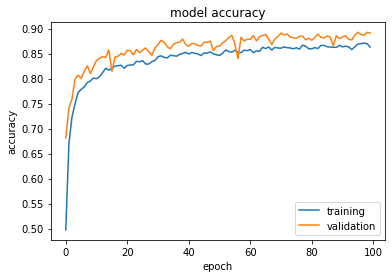

Test loss: 0.491
Test accuracy: 0.868


In [16]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["acc"])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [17]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

In [18]:
model.layers[0].get_weights()[1]

array([-0.00079743, -0.00534785,  0.00614052,  0.00504828, -0.00345586,
       -0.00277898,  0.00473655, -0.00240046], dtype=float32)

In [19]:
model.layers[1].get_weights()[1]

array([ 0.23346059, -1.2188152 ,  0.19970933,  0.2983388 ,  0.19153804,
        0.11334501, -0.45825273, -0.3669184 ,  0.09870514,  0.9088893 ],
      dtype=float32)

In [20]:
fw = (first_layer_weights*1000).astype(int)
sw = (second_layer_weights*10).astype(int) 
fb = (first_layer_biases*10).astype(int)  
sb = (second_layer_biases*10).astype(int)

In [21]:
# fw = first_layer_weights
# sw = second_layer_weights
# fb = first_layer_biases 
# sb = second_layer_biases

In [22]:
fb

array([0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
fw.shape

(784, 8)

In [24]:
sw.shape

(8, 10)

In [25]:
fw

array([[-41, -53,  35, ...,  83, -81,  39],
       [-70, -37,  15, ...,  66, -22, -74],
       [-44, -22,  80, ...,  19,  53, -20],
       ...,
       [ 33, -52,   7, ...,  66,  64,  47],
       [-44, -34, -77, ..., -77,  32,  62],
       [-84, -58, -84, ..., -22, -26,  42]])

In [26]:
sw

array([[ 14,   3,  13,   6, -25,  -2, -24,  14,  15, -24],
       [-12,  30, -19, -12,  -4,  16,   4, -13,  18,  -4],
       [ 27, -19,   6,   1, -14,  26,  20, -25, -10, -15],
       [ -3, -11,  -8, -10,  28,   1,  24,  10, -13, -12],
       [-17,   4,  16, -22,  19, -16,   5, -14,   8,  13],
       [-23, -18, -20,  19,   5,  12, -20,  12,  10,  10],
       [ 13,   8, -14, -11, -11, -11,  -6,  27, -15,  21],
       [-21,  22,  12,  26, -15, -10,  14,  -3, -14, -17]])

In [27]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))
def softmax(x):
    sumexp = np.sum(np.exp(x))
    return((np.exp(x)/sumexp))
def layer1(x,w,b):
    return sigmoid(np.dot(x,w)+b)
def layer2(x,w,b):
    return  softmax(np.dot(x,w)+b)
layer1_out = layer1(x_test,fw,fb)
layer2_out = layer2(layer1_out,sw,sb)
pred= np.zeros(layer2_out.shape[0])
for i in range(layer2_out.shape[0]):
    pred[i] = np.argmax(layer2_out[i])

/Users/Syed/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [28]:
y_orig_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
pred

array([7., 2., 1., ..., 4., 5., 6.])

In [33]:
from sklearn.metrics import accuracy_score
bi= accuracy_score(pred,y_orig_test)
bi

0.8668

In [36]:
# x = x_test[0].tolist()

w11 = fw[:,0].tolist()
w12 = fw[:,1].tolist()
w13 = fw[:,2].tolist()
w14 = fw[:,3].tolist()

w15= fw[:,4].tolist()
w16= fw[:,5].tolist()
w17= fw[:,6].tolist()
w18= fw[:,7].tolist()

w21 = sw[:,0].tolist()
w22 = sw[:,1].tolist()
w23 = sw[:,2].tolist()
w24 = sw[:,3].tolist()
w25 = sw[:,4].tolist()
w26 = sw[:,5].tolist()
w27 = sw[:,6].tolist()
w28 = sw[:,7].tolist()
w29 = sw[:,8].tolist()
w30 = sw[:,9].tolist()

b11 = fb.tolist()
b2 = sb.tolist()

In [37]:
b11

[0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
b2

[2, -12, 1, 2, 1, 1, -4, -3, 0, 9]

In [39]:
type(w11)

list

In [40]:
# print(nn_cont.functions.print_l1().call())
# print(nn_cont.functions.print_l2().call())
# n, d = sig_cont.functions.sigprint().call()
# print("value of sigmoid is:", n/d)
# print(soft_cont.functions.set_softmax().call())

In [41]:
# x = np.arange(1,784).tolist()
# w11 = np.arange(1,784).tolist()
# w12 = np.arange(1,784).tolist()
# w13 = np.arange(1,784).tolist()
# w14 = np.arange(1,784).tolist()
# b1 = np.arange(1,5).tolist()

In [42]:
##testing a sample  in layer 1

In [45]:
hb1 = b11[:4]
hb2 = b11[4:]

In [44]:
print(np.sum(x_test[2]* fw[:,0]))

378409


In [48]:
pred_t= np.zeros(100)
## multiply layer 1
for i in range(100):
    l1_mult= np.zeros(8)
    l1_out= np.zeros(8)
    x= x_test[i].tolist()
    getlayer1(x,w11,w12,w13,w14,hb1)
    # getlayer1(x,w11,w12,w13,w14,b1)
    l1_mult[:4]=nn_cont.functions.print_l1().call()
    getlayer1(x,w15,w16,w17,w18,hb2)
    # getlayer1(x,w11,w12,w13,w14,b1)
    l1_mult[4:]=nn_cont.functions.print_l1().call()
#     print("Layer 1 multiplication answer",l1_mult)
    ## get sigmoid
    for j in range(len(l1_mult)):
#         print((int(l1_mult[i]),1,int(abs(l1_mult[i])),1))
        sigfrac(int(l1_mult[j]),1,int(abs(l1_mult[j])),1)
#         print(sig_cont.functions.sigprint().call())
        n,d = sig_cont.functions.sigprint().call()
        l1_out[j] = n/d
    
    #multiply layer 2
    l2_mult = np.zeros(10)
    l2_out = np.zeros(10)
    l1_out = l1_out.astype(int)
    l1_out = l1_out.tolist()
    getlayer2(l1_out,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2)
    l2_out[:] = nn_cont.functions.print_l2().call()
    pred_t[i] = np.argmax(l2_out)
    print("predicted class",np.argmax(l2_out))
    print(i)
    

predicted class 7
0
predicted class 2
1
predicted class 1
2
predicted class 0
3
predicted class 4
4
predicted class 1
5
predicted class 4
6
predicted class 9
7
predicted class 6
8
predicted class 9
9
predicted class 0
10
predicted class 6
11
predicted class 9
12
predicted class 0
13
predicted class 1
14
predicted class 5
15
predicted class 9
16
predicted class 7
17
predicted class 3
18
predicted class 4
19
predicted class 9
20
predicted class 6
21
predicted class 6
22
predicted class 5
23
predicted class 4
24
predicted class 0
25
predicted class 7
26
predicted class 4
27
predicted class 0
28
predicted class 1
29
predicted class 3
30
predicted class 1
31
predicted class 3
32
predicted class 6
33
predicted class 7
34
predicted class 2
35
predicted class 7
36
predicted class 1
37
predicted class 3
38
predicted class 1
39
predicted class 1
40
predicted class 7
41
predicted class 4
42
predicted class 2
43
predicted class 3
44
predicted class 5
45
predicted class 1
46
predicted class 2
47
pr

In [49]:

# print(l2_out)
## get softmax

pred_t

array([7., 2., 1., 0., 4., 1., 4., 9., 6., 9., 0., 6., 9., 0., 1., 5., 9.,
       7., 3., 4., 9., 6., 6., 5., 4., 0., 7., 4., 0., 1., 3., 1., 3., 6.,
       7., 2., 7., 1., 3., 1., 1., 7., 4., 2., 3., 5., 1., 2., 4., 4., 6.,
       3., 5., 5., 6., 5., 4., 1., 9., 0., 7., 8., 8., 2., 7., 4., 2., 4.,
       3., 0., 7., 0., 3., 8., 1., 7., 5., 7., 9., 7., 7., 6., 2., 7., 8.,
       4., 7., 3., 6., 1., 3., 6., 9., 3., 1., 4., 3., 7., 6., 9.])

In [50]:
y_orig_test[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [123]:
len(y_orig_test)

10000

In [51]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(pred_t[:100],y_orig_test[:100])
sc

0.87

In [125]:
int(pred_t*100)

TypeError: only size-1 arrays can be converted to Python scalars

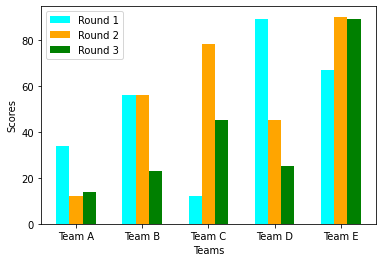

In [52]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(5)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()

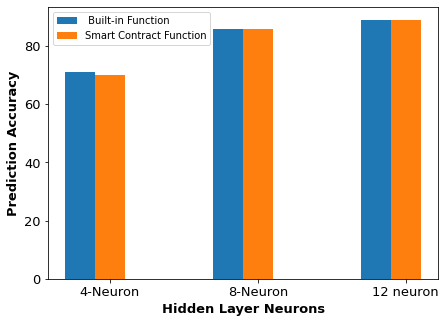

In [68]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(3)
y1 = [71,86,89]
y2 = [70, 86, 89]
width = 0.2
  
# plot data in grouped manner of bar type
plt.figure(figsize=(7,5))
plt.bar(x-0.2, y1, width, label=" Built-in Function")
plt.bar(x, y2, width,  label ="Smart Contract Function")
plt.xticks(x, ['4-Neuron', '8-Neuron', '12 neuron'])
plt.xlabel("Hidden Layer Neurons",fontsize =13,fontweight='bold')
plt.ylabel("Prediction Accuracy",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.savefig('NN-Accuracy.pdf',bbox_inches='tight')
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('neurons_gas.csv')
df.head()

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20
0,32735,42014.0,51305.0,60608.0,69887.0,79203.0,88482.0,97797.0000,107048.6000,116338.4000,125644.1600,134935.4982,144226.8364,153518.1745,162809.5127,172100.8509,181392.1891,190683.5273,199974.8655,209266.2036
1,35429,47355.0,59281.0,71207.0,85868.0,101986.0,118125.0,134253.0000,145351.9643,159499.5119,173647.0595,187794.6071,201942.1548,216089.7024,230237.2500,244384.7976,258532.3452,272679.8929,286273.1526,300282.1282
2,38123,52384.0,67233.0,81819.0,96380.0,110942.0,125468.0,140092.4286,154674.5000,169256.5714,183838.6429,198420.7143,213002.7857,227584.8571,242166.9286,256749.0000,271331.0714,285913.1429,300495.2143,315077.2857
3,39331,58013.0,75222.0,92418.0,109603.0,126800.0,144009.0,161626.4286,178983.1786,196339.9286,213696.6786,231053.4286,248410.1786,265766.9286,283123.6786,300480.4286,317837.1786,335193.9286,352550.6786,369907.4286
4,43511,63354.0,83186.0,103023.5,122849.5,142669.5,162502.0,182337.5714,202168.5536,221999.5357,241830.5179,261661.5000,281492.4821,301323.4643,321154.4464,340985.4286,360816.4107,380647.3929,400478.3750,420309.3571


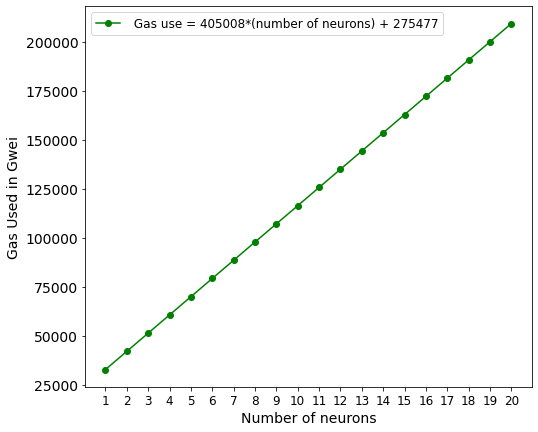

In [52]:
import matplotlib.pyplot as plt
import numpy as np
test = df.to_numpy()
s = np.array(test[0]).astype(int)
plt.figure(figsize=(8, 7))
d = np.arange(len(s)).astype(int)
plt.xlabel(  "Number of neurons",fontsize =14)
plt.ylabel( "Gas Used in Gwei",fontsize=14)

l = np.arange(1,21)
plt.plot(l, s, color ='g',marker='o', label = " Gas use = 405008*(number of neurons) + 275477", )
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=12)

plt.xticks(ticks=l) 

# ax.tick_params(direction='out', length=6, width=2, colors='r',
#                grid_color='r', grid_alpha=0.5)

plt.legend(fontsize=12)
plt.savefig("layer1-nn-gas2.pdf", bbox_inches='tight')
plt.show()

In [ ]:
x = np.arange (5,800,5)
len(x)
gas_tx = np.array([55618, 66556, 77532, 88486, 99431, 110391, 121364, 132329, 143283, 154241, 165236, 176210, 187175, 198154, 209147, 220131, 231105, 242082, 253097, 264091, 275075, 286073, 297086, 308089, 319083, 330079, 341114, 352127, 363131, 374149, 385181, 396204, 407217, 418233, 429287, 440320, 451343, 462381, 473432, 484475, 495508, 506543, 517617, 528669, 539712, 550769, 561840, 572902, 583954, 595009, 606103, 617414, 628776, 640153, 651544, 662926, 674297, 685672, 697085, 708476, 719858, 731254, 742664, 754065, 765457, 776851, 788283, 799694, 811095, 822511, 833941, 845361, 856772, 868186, 879637, 891068, 902488, 913924, 925373, 936813, 948244, 959689, 971160, 982610, 994050, 1005505, 1016974, 1028434, 1039884, 1051336, 1062827, 1074297, 1085756, 1097231, 1108719, 1120198, 1131668, 1143140, 1154650, 1166139, 1177619, 1189113, 1200573, 1212071, 1223560, 1235052, 1246582, 1258090, 1269589, 1281103, 1292630, 1304149, 1315657, 1327168, 1338718, 1350246, 1361764, 1373297, 1384844, 1396382, 1407910, 1419441, 1431010, 1442557, 1454095, 1465648, 1477214, 1488772, 1500319, 1511870, 1523458, 1535025, 1546583, 1558155, 1569741, 1581318, 1592897, 1604467, 1616075, 1627661, 1639238, 1650830, 1662436, 1674032, 1685619, 1697208, 1708835, 1720442, 1732038, 1743649, 1755274, 1766890, 1778497, 1790045, 1801692, 1813318, 1824934, 1836565, 1848210])
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(x,gas_tx, label = "Gas Use = 7637*(Number of features) + 121794",marker='o')
plt.ticklabel_format(style='plain')
plt.xlabel("Number of input features",fontsize =14)
plt.ylabel("Gas Used in Gwei",fontsize=14)

# plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
# plt.ylabel("Sigmoid Function Output value", fontsize=14)

# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.tick_params(axis='both', which='minor', labelsize=14)
plt.legend(fontsize=12)
plt.savefig("feature-gas-layer1.pdf", bbox_inches='tight')
plt.show()

/Users/Syed/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


(40, 40)
(40, 40)
(40, 40)
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.25  4.25  4.25 ...  4.25  4.25  4.25]
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]]


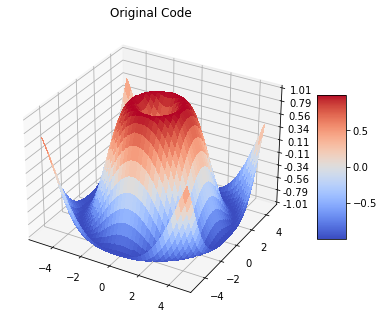

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

In [92]:
X = np.arange(1, 21,1)
Y = np.arange(1, 21,1)
X, Y = np.meshgrid(X, Y)
Y.shape
Z= df.to_numpy()

X.shape

(20, 20)

/Users/Syed/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


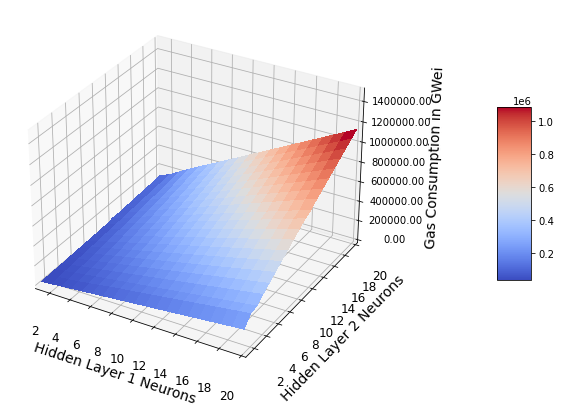

In [135]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1500000)
ax.tick_params(axis='both', which='major', pad=15)
# ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.3, aspect=5, pad =0.2)
ax.set_xlabel('Hidden Layer 1 Neurons',labelpad=15,fontsize=14)
ax.set_ylabel('Hidden Layer 2 Neurons',labelpad=15,fontsize=14)
ax.set_zlabel('Gas Consumption in GWei',labelpad=25,fontsize=14)
setx = np.arange(0,21,2)
sety = np.arange(0,21,2)
plt.xticks(setx, fontsize=12)
plt.yticks(sety, fontsize=12)
plt.margins(x=0, y=0)
# plt.title('Original Code')
plt.savefig('neuron_gas.pdf',bbox_inches='tight')
plt.show()

(10, 10)
(10, 10)
(10, 10)


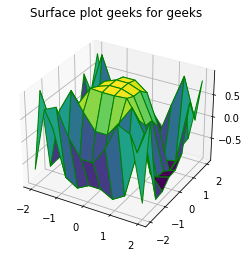

In [73]:

# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# defining surface and axes
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
print(x.shape)
y = x.copy().T
print(y.shape)
z = np.cos(x ** 2 + y ** 3)
print(z.shape)
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

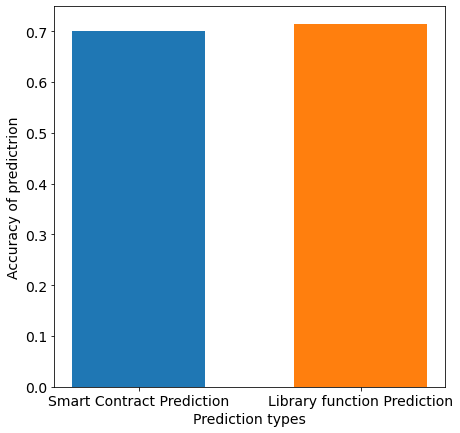

In [129]:
import matplotlib.pyplot as plt
x = np.arange(100)
plt.figure(figsize=(7,7))
plt.bar("Smart Contract Prediction", sc,width=0.6 )
plt.bar("Library function Prediction", bi,width=0.6)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("Prediction types",fontsize=14)
plt.ylabel("Accuracy of predictrion",fontsize=14)
plt.savefig("pred_accuracy.pdf",bbox_inches='tight')

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_orig_test[:100],pred[:100])
cm

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  8,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  0, 12,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  3,  0],
       [ 0,  1,  1,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  1,  0,  0]])

<AxesSubplot:>

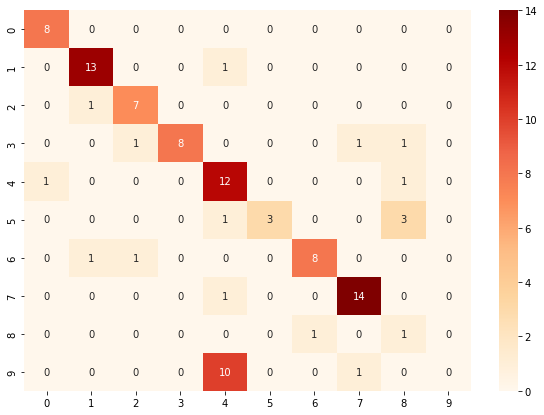

In [131]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_orig_test[:100],pred_t[:100])
cm

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  8,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  0, 12,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  3,  0],
       [ 0,  1,  1,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  1,  0,  0]])

<AxesSubplot:>

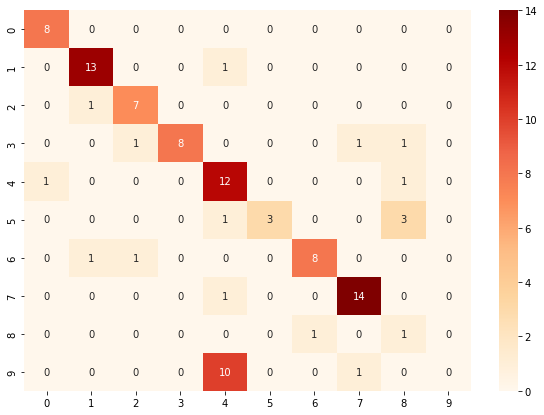

In [133]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")

In [182]:
for i in range(len(l2_out)):
    getexpon(int(l2_out[i]),1, abs(int(l2_out[i])),1)
getsumexpon()
getsoftmax()
smaxn,smaxd = soft_cont.functions.set_softmax().call()

In [183]:
print(smaxn,smaxd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
## testing prediction with builtin functions

In [16]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))
def softmax(x):
    sumexp = np.sum(np.exp(x))
    return((np.exp(x)/sumexp))
def layer1(x,w,b):
    return sigmoid(np.dot(x,w)+b)
def layer2(x,w,b):
    return  softmax(np.dot(x,w)+b)

In [17]:
layer1_out = layer1(x_test,fw,fb)
# layer1_out[:50]


/Users/Syed/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [18]:
layer2_out = layer2(layer1_out,sw,sb)
layer2_out[0]

array([2.76898550e-20, 2.98692853e-44, 6.98583051e-22, 4.64583254e-21,
       1.50356482e-37, 6.86730237e-36, 3.05191685e-42, 8.96994448e-16,
       1.65533536e-39, 6.15235175e-36])

In [19]:
pred= np.zeros(layer2_out.shape[0])
for i in range(layer2_out.shape[0]):
    pred[i] = np.argmax(layer2_out[i])

In [20]:
y_orig_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
pred

array([7., 2., 1., ..., 4., 5., 6.])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_orig_test)

0.6137

In [208]:
# in depth layers

def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


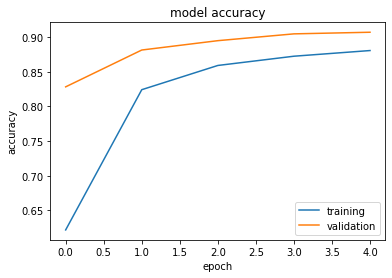


Test loss: 0.494
Test accuracy: 0.888
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


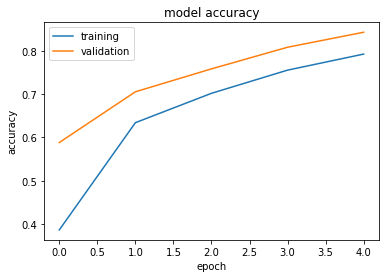


Test loss: 1.16
Test accuracy: 0.814
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


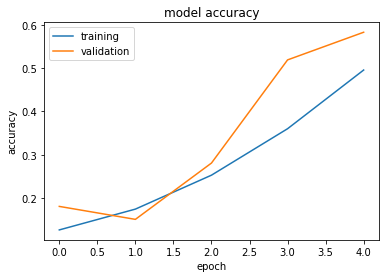


Test loss: 2.15
Test accuracy: 0.569
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


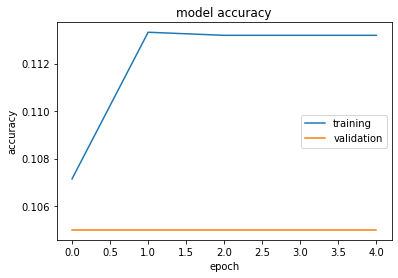


Test loss: 2.29
Test accuracy: 0.113


In [27]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)